In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Loading the data 
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [3]:
train_m = train_set_x_orig.shape[0]
print('Training Example :',train_m)
num_px = train_set_x_orig.shape[2]
print ("Height/Width of each image: num_px = " + str(num_px))

Training Example : 209
Height/Width of each image: num_px = 64


In [4]:
## Now we will convert train data into matrix of n*m where n will ne no of features and m will be no of examples
## A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b ∗∗ c ∗∗ d, a) is to use:

##               X_flatten = X.reshape(X.shape[0], -1).T

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [5]:
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [6]:
def layers_sizes(X,Y):
    
    ## First layer size
    first_layer = X.shape[0]
    
    ## Second Layer
    second_layer = 4
    
    ##Third Layer
    final_layer = Y.shape[0]
    
    return(first_layer,second_layer,final_layer)
       

In [7]:
def random_weights(first_layer,second_layer,final_layer):
    
    ## Here we will randomly initialize weights for each layer
    
    ## Hidden Layer 
    
    W1 = np.random.randn(second_layer, first_layer) * 0.01 #making the weights small
    b1 = np.zeros((second_layer,1))
    
    W2 = np.random.randn(final_layer, second_layer) * 0.01 
    b2 = np.zeros((final_layer,1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [8]:
first_layer,second_layer,final_layer = layers_sizes(train_set_x_flatten,train_set_y)

parameters = random_weights(first_layer,second_layer,final_layer)

In [9]:
##SIGMOID Function for last layer
def sigmoid(z):

    s = 1/(1+np.exp(-z))

    return s

In [10]:
def forward_propagation(X,parameters):
    
    ## loading the weights from the previous function
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    ## Calculating the Z function and using sigmoid activation
    # First Layer 
    Z1 = np.dot(W1,X)+b1
    A1 = sigmoid(Z1)   ## tanh activation can also be used here
    
    #Second layer
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2,cache
    
    

In [11]:
A2, cache = forward_propagation(train_set_x_flatten,random_weights(first_layer,second_layer,final_layer))

In [12]:
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-71.48295265718532 0.2669883856551358 0.00016517072906248122 0.5000413063098956


In [13]:
def cost_function(A2,Y):
    
    # no of examples
    m = Y.shape[1]
    
    ## log probability
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    
    cost = float(np.squeeze(cost))
    
    return cost

In [14]:
cost_function(A2,train_set_y)

0.6928270035061831

In [15]:
def backward_propagation(parameters, cache, X, Y):
    
    m = X.shape[1]

    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    ## Calculating error from log function
    dZ2 = A2-Y
    
    #Accordingly finding the gradient value to change in weights of layer2
    dW2 = (np.dot(dZ2, A1.T))/m
    
    #According finding the gradient value to change in bias of layer2
    db2 = (np.sum(dZ2, axis=1, keepdims=True))/m
    
    
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    
    #According finding the gradient value to change in weights of layer1
    dW1 = (np.dot(dZ1, X.T))/m
    
    #According finding the gradient value to change in bias of layer1
    db1 = (np.sum(dZ1, axis=1, keepdims=True))/m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return(grads)
    
    
    

In [16]:
grads = backward_propagation(parameters, cache, train_set_x_flatten, train_set_y)

In [17]:
def update_parameters(parameters, grads, learning_rate = 1.0):
    
    ##old parameters
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    ##gradients of parameters
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    ## Updated Parameters
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [18]:
parameters = update_parameters(parameters, grads)


In [19]:
def ann_model(X, Y, second_layer,iterations = 10000):
    
    np.random.seed(3)
    first_layer = layers_sizes(X,Y)[0]  ##input layer
    final_layer = layers_sizes(X,Y)[2]  ##final_layer
    
    parameters = random_weights(first_layer, second_layer, final_layer) ##initializing random weights
    cost_values = []
    for i in range(0,iterations):
         
        A2, cache = forward_propagation(X, parameters) ##using weights to get prediction 
        
        cost = cost_function(A2, Y)                ## calculating loss with the parameters
        cost_values.append(cost)                  
 
        grads = backward_propagation(parameters, cache, X, Y)  ## Performing backward_propagation
 
        parameters = update_parameters(parameters, grads)    ## updating parameters for next iteration
        
        if i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    return(parameters,cost_values)

        

In [20]:
def prediction(parameters,X_test):
    
    ## Using the final parameters for prediction
    A2, cache = forward_propagation(X_test, parameters)
    
    ## if prob is less than 0.5 then zero and if greater than 0.5 then 1
    predictions = np.round(A2)
    
    return(predictions)

In [21]:
## Standardizing our dataset
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [22]:
parameters,cost_values = ann_model(train_set_x, train_set_y,second_layer =  20, iterations=5000)

Cost after iteration 0: 0.698571
Cost after iteration 1000: 0.358851
Cost after iteration 2000: 0.242121
Cost after iteration 3000: 0.320096
Cost after iteration 4000: 0.328232


In [23]:
# Print accuracy
Y = test_set_y
predictions = prediction(parameters, test_set_x_flatten)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 70%


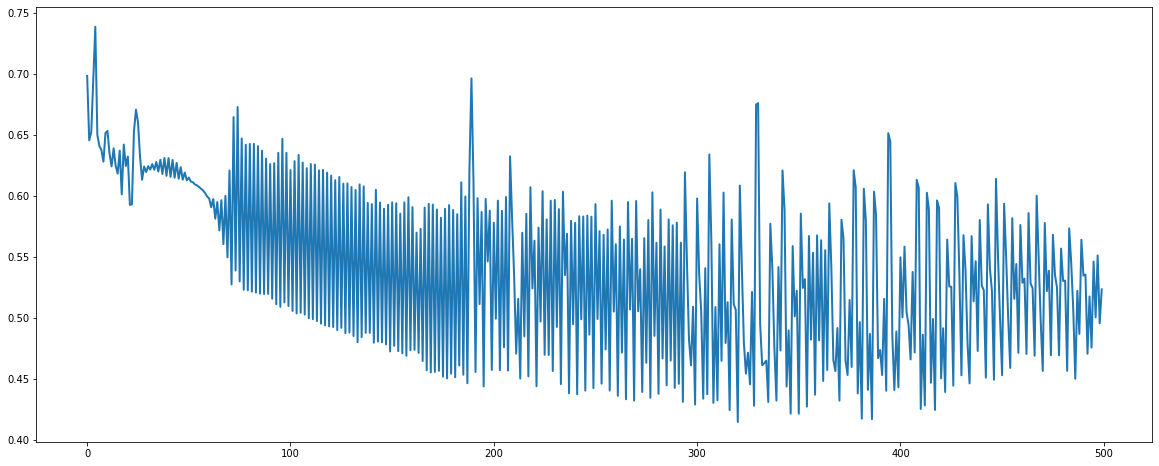

In [24]:
##plotting first 500 values of cost function
plt.figure(figsize=(20, 8))
plt.plot(cost_values[0:500], linewidth=2)

In [26]:
df = pd.read_csv(r"Churn_Modelling.csv")

predictors = ['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
              'IsActiveMember', 'EstimatedSalary',]

qual_preds = ['Geography','Gender']

def classifier_model(df, target, predictors,qual_preds, dummy = True):
    result = pd.DataFrame()
    df_pre = df.copy()
    scaler = MinMaxScaler()
    
    if dummy == True:
        df_pre = pd.get_dummies(df_pre, columns = qual_preds, drop_first= True)
    
    y = df[target]
    X = df_pre
    scale = list(set(predictors) - set(qual_preds))
    X[scale] = scaler.fit_transform(X[scale])
        
    X_train = X.iloc[:-2000,:]
    X_test = X.iloc[-2000:,:]
    y_train = y.iloc[:-2000]
    y_test = y.iloc[-2000:]
    X_train = X_train.drop(['CustomerId','Surname'],axis =1)
    X_test = X_test.drop(['CustomerId','Surname'],axis =1)
    X_train =  np.array(X_train.drop('RowNumber',axis = 1).T)
    y_train = np.array(y_train).reshape((1,-1))
    y_test = np.array(y_test).reshape((1,-1))
    X_test =  np.array(X_test.drop('RowNumber',axis = 1).T)

    return(X_train,y_train,X_test,y_test)


X_train,y_train,X_test,y_test = classifier_model(df, 'Exited', predictors,qual_preds, dummy = True)

In [27]:
parameters,cost_values = ann_model(X_train, y_train,second_layer =  20, iterations=5000)

Cost after iteration 0: 0.709499
Cost after iteration 1000: 0.068980
Cost after iteration 2000: 0.068070
Cost after iteration 3000: 0.094048
Cost after iteration 4000: 0.088329


In [28]:
Y = y_test
predictions = prediction(parameters, X_test)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 99%


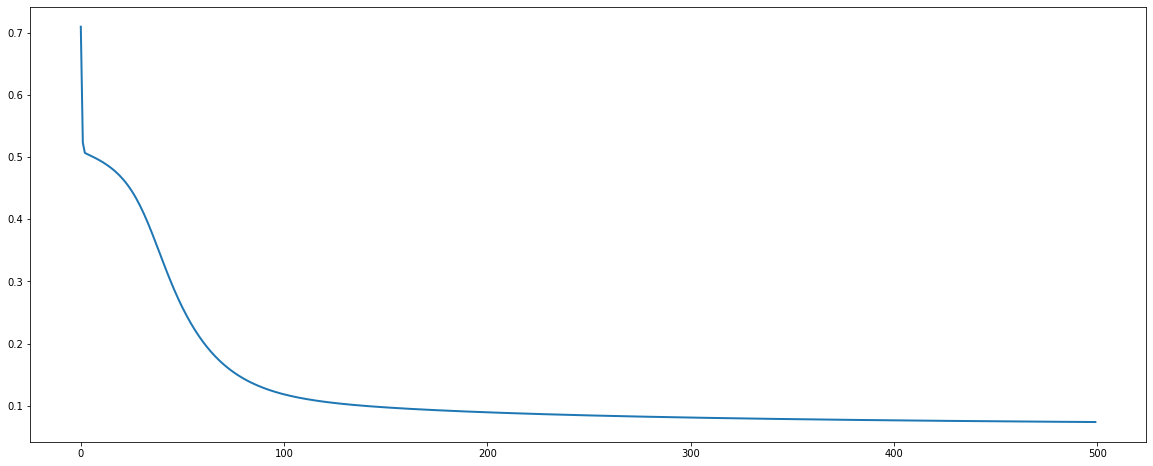

In [29]:
##plotting first 500 values of cost function
plt.figure(figsize=(20, 8))
plt.plot(cost_values[0:500], linewidth=2)